# Generating Base SFH Spectra
Run this notebook to generate a 2D dataset containing the average galaxy spectrum for each age bin, ending up with a set of 10 spectra.

In [ ]:
# imports
import os
os.environ['SPS_HOME'] = '/home/vmehta/honours-project/code/src/fsps'

import fsps
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thesis')

In [2]:
# initialising as much as possible universally

sp = fsps.StellarPopulation(
    sfh=0,
    imf_type=1,
    zmet = 10,
    add_dust_emission=False,
    nebemlineinspec=False,
)

bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
bins = np.log10(bin_arr)

In [3]:
w,s = sp.get_spectrum()
ages = sp.ssp_ages
w = w[470:2137]
s = s[:, 470:2137]

In [4]:
# average spectrum for each log-age bin
digitized = np.digitize(ages, bins) - 1  # convert to 0-based bin indices
n_bins = len(bins) - 1
avg_spectra = []
for i in range(n_bins):
    mask = digitized == i
    if not np.any(mask):
        raise ValueError(f"No SSP ages fall into bin {i} [{bins[i]:.2f}, {bins[i+1]:.2f})")
    avg_spectra.append(s[mask].mean(axis=0))
avg_spectra = np.vstack(avg_spectra)
print(f"Built {avg_spectra.shape[0]} binned spectra on {avg_spectra.shape[1]} wavelengths.")

Built 10 binned spectra on 1667 wavelengths.


In [ ]:
#np.save('/home/vmehta/honours-project/pyght/data/sfh_binned_spectra.npy', avg_spectra)

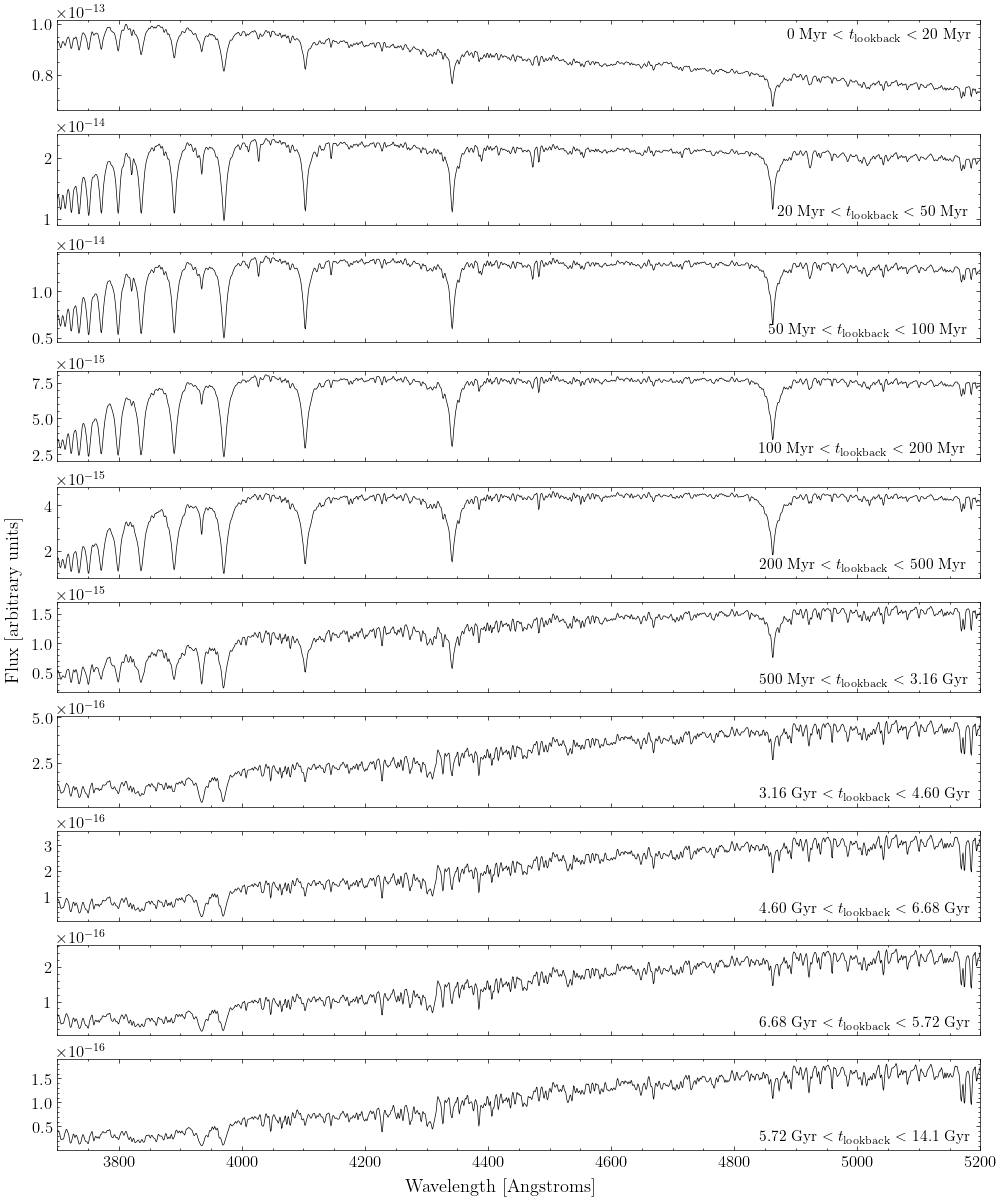

In [13]:
fig, ax = plt.subplots(10, 1, figsize=(10,12), sharex=True, constrained_layout=True)
for i, s in enumerate(avg_spectra):
    ax[i].plot(w, s, 'k', linewidth=0.5)

ax[0].text(0.79, 0.8, '0 Myr $<t_\\mathrm{lookback}<$ 20 Myr', transform=ax[0].transAxes)
ax[1].text(0.78, 0.1, '20 Myr $<t_\\mathrm{lookback}<$ 50 Myr', transform=ax[1].transAxes)
ax[2].text(0.77, 0.1, '50 Myr $<t_\\mathrm{lookback}<$ 100 Myr', transform=ax[2].transAxes)
ax[3].text(0.76, 0.1, '100 Myr $<t_\\mathrm{lookback}<$ 200 Myr', transform=ax[3].transAxes)
ax[4].text(0.76, 0.1, '200 Myr $<t_\\mathrm{lookback}<$ 500 Myr', transform=ax[4].transAxes)
ax[5].text(0.76, 0.1, '500 Myr $<t_\\mathrm{lookback}<$ 3.16 Gyr', transform=ax[5].transAxes)
ax[6].text(0.76, 0.1, '3.16 Gyr $<t_\\mathrm{lookback}<$ 4.60 Gyr', transform=ax[6].transAxes)
ax[7].text(0.76, 0.1, '4.60 Gyr $<t_\\mathrm{lookback}<$ 6.68 Gyr', transform=ax[7].transAxes)
ax[8].text(0.76, 0.1, '6.68 Gyr $<t_\\mathrm{lookback}<$ 5.72 Gyr', transform=ax[8].transAxes)
ax[9].text(0.76, 0.1, '5.72 Gyr $<t_\\mathrm{lookback}<$ 14.1 Gyr', transform=ax[9].transAxes)

ax[0].set_xlim(3700,5200)
fig.supylabel('Flux [arbitrary units]')
fig.supxlabel('Wavelength [Angstroms]')

plt.savefig('/home/vmehta/honours-project/thesis/figures/sfh_averages.pdf', format='pdf')
plt.show()